In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/My Drive/Colab Notebooks/INSY_Proj_Toronto_Fire')

['Fire Incidents Data.csv', 'INSY_proj_Fire_EDA.ipynb']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#import missingno as msno

# Code from before. no need to run  now

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/INSY_Proj_Toronto_Fire/Fire Incidents Data.csv')
df.head()
df.shape[0]

<ipython-input-4-584cd9543ff1>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/INSY_Proj_Toronto_Fire/Fire Incidents Data.csv')


32929

<Axes: >

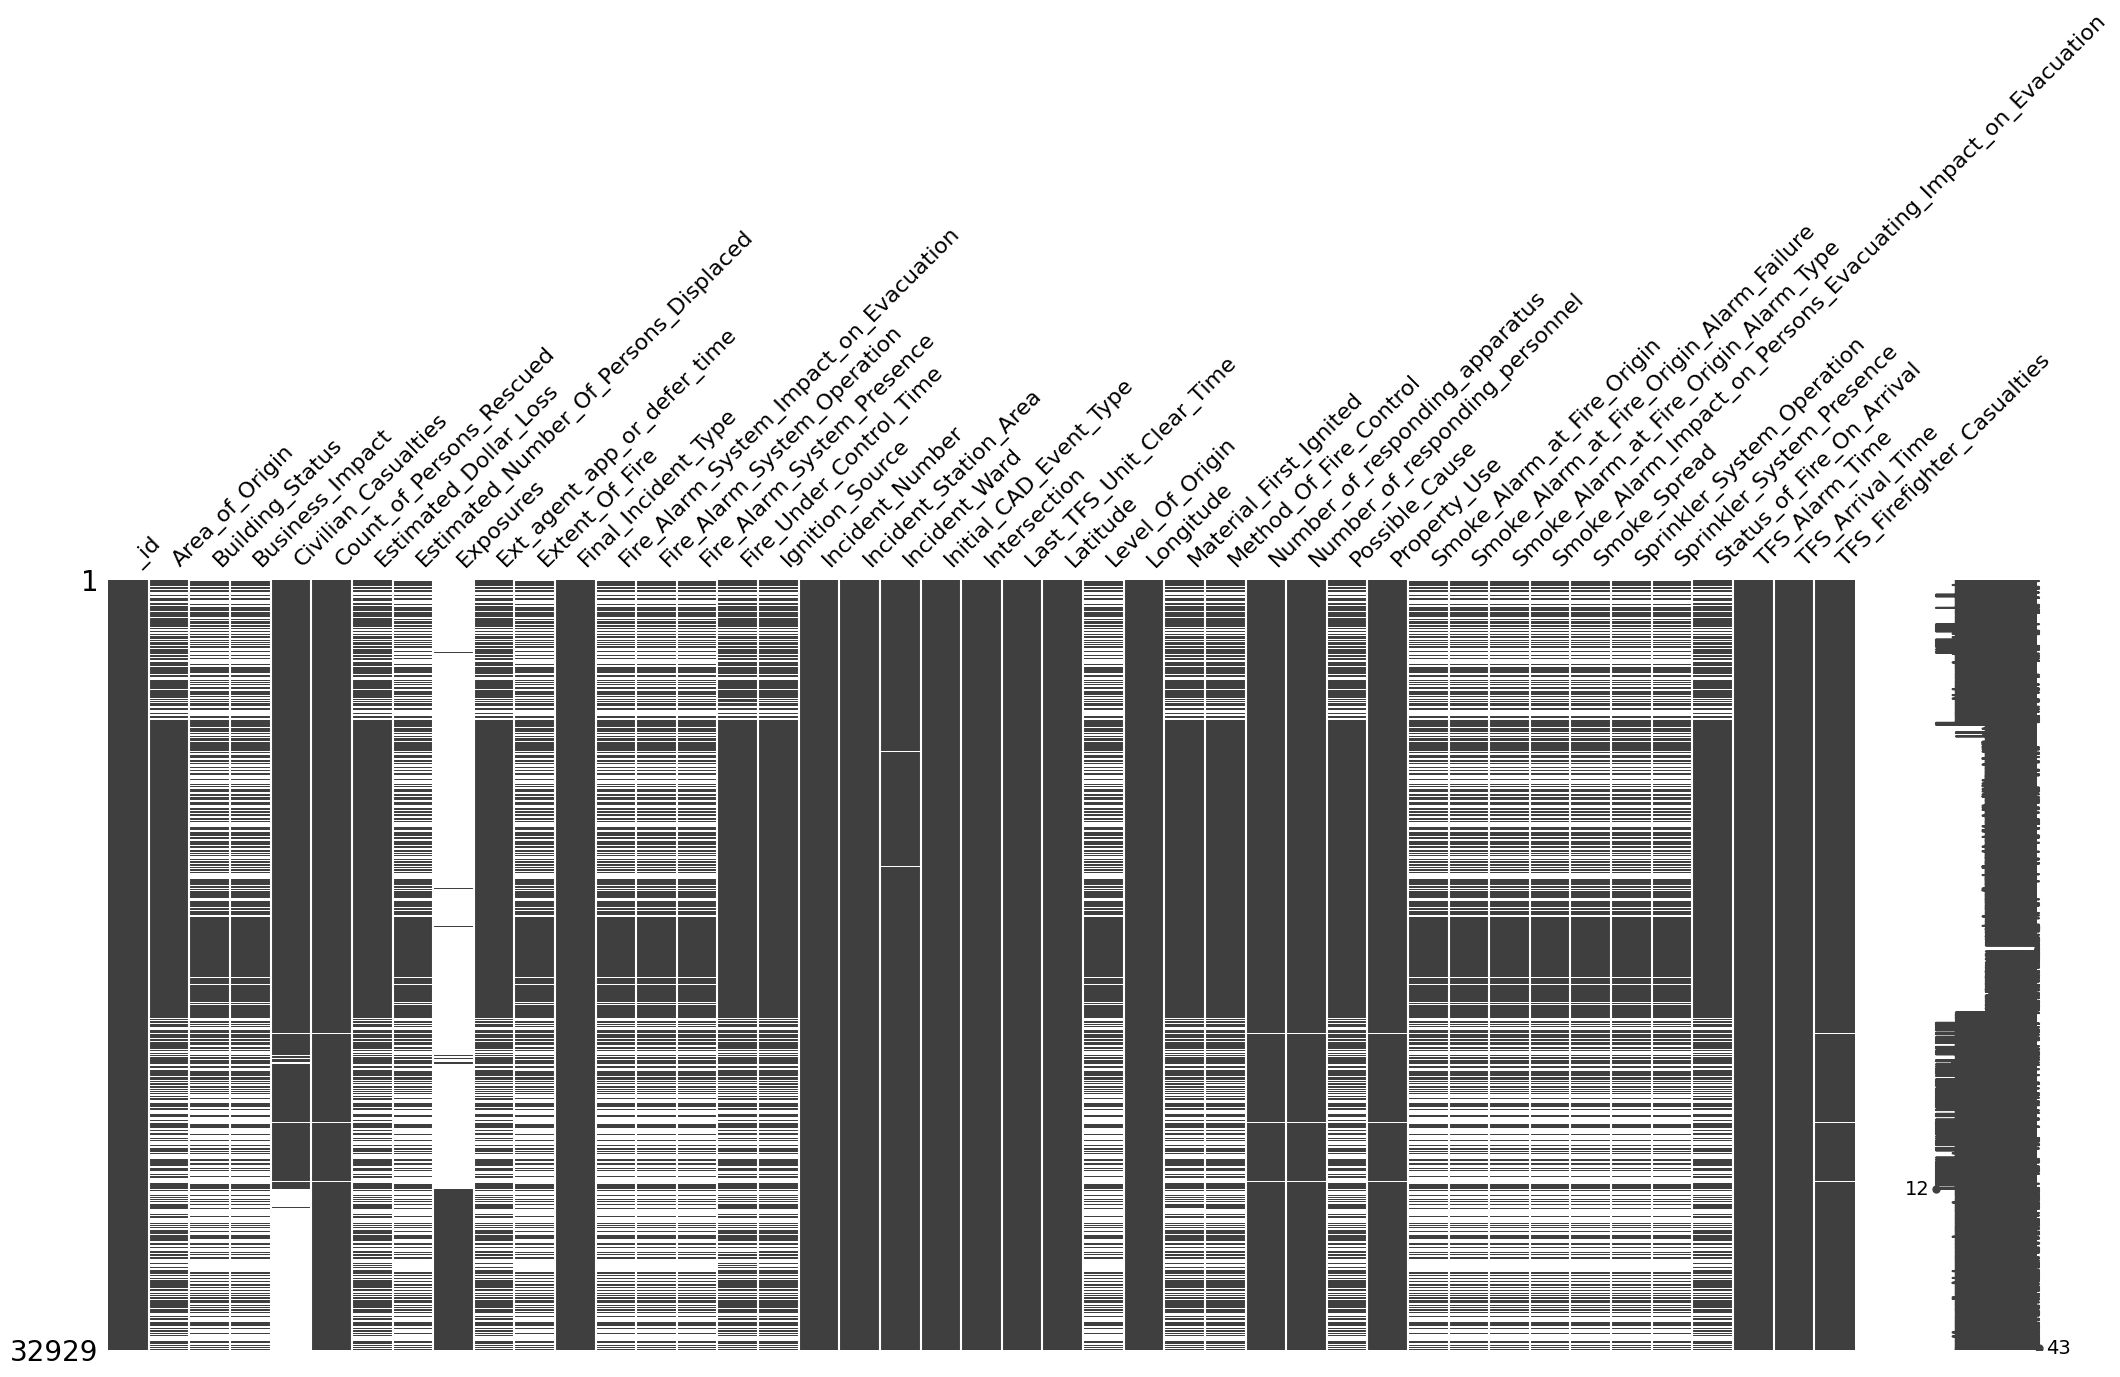

In [ ]:
msno.matrix(df)

In [ ]:
#after our analysis on NA values of estimated dollar loss, we decided to drop all rows that had NA vlaue in dollar loss column
df_noNA = df.dropna(subset=['Estimated_Dollar_Loss'])
df_noNA.shape[0]

23950

<Axes: >

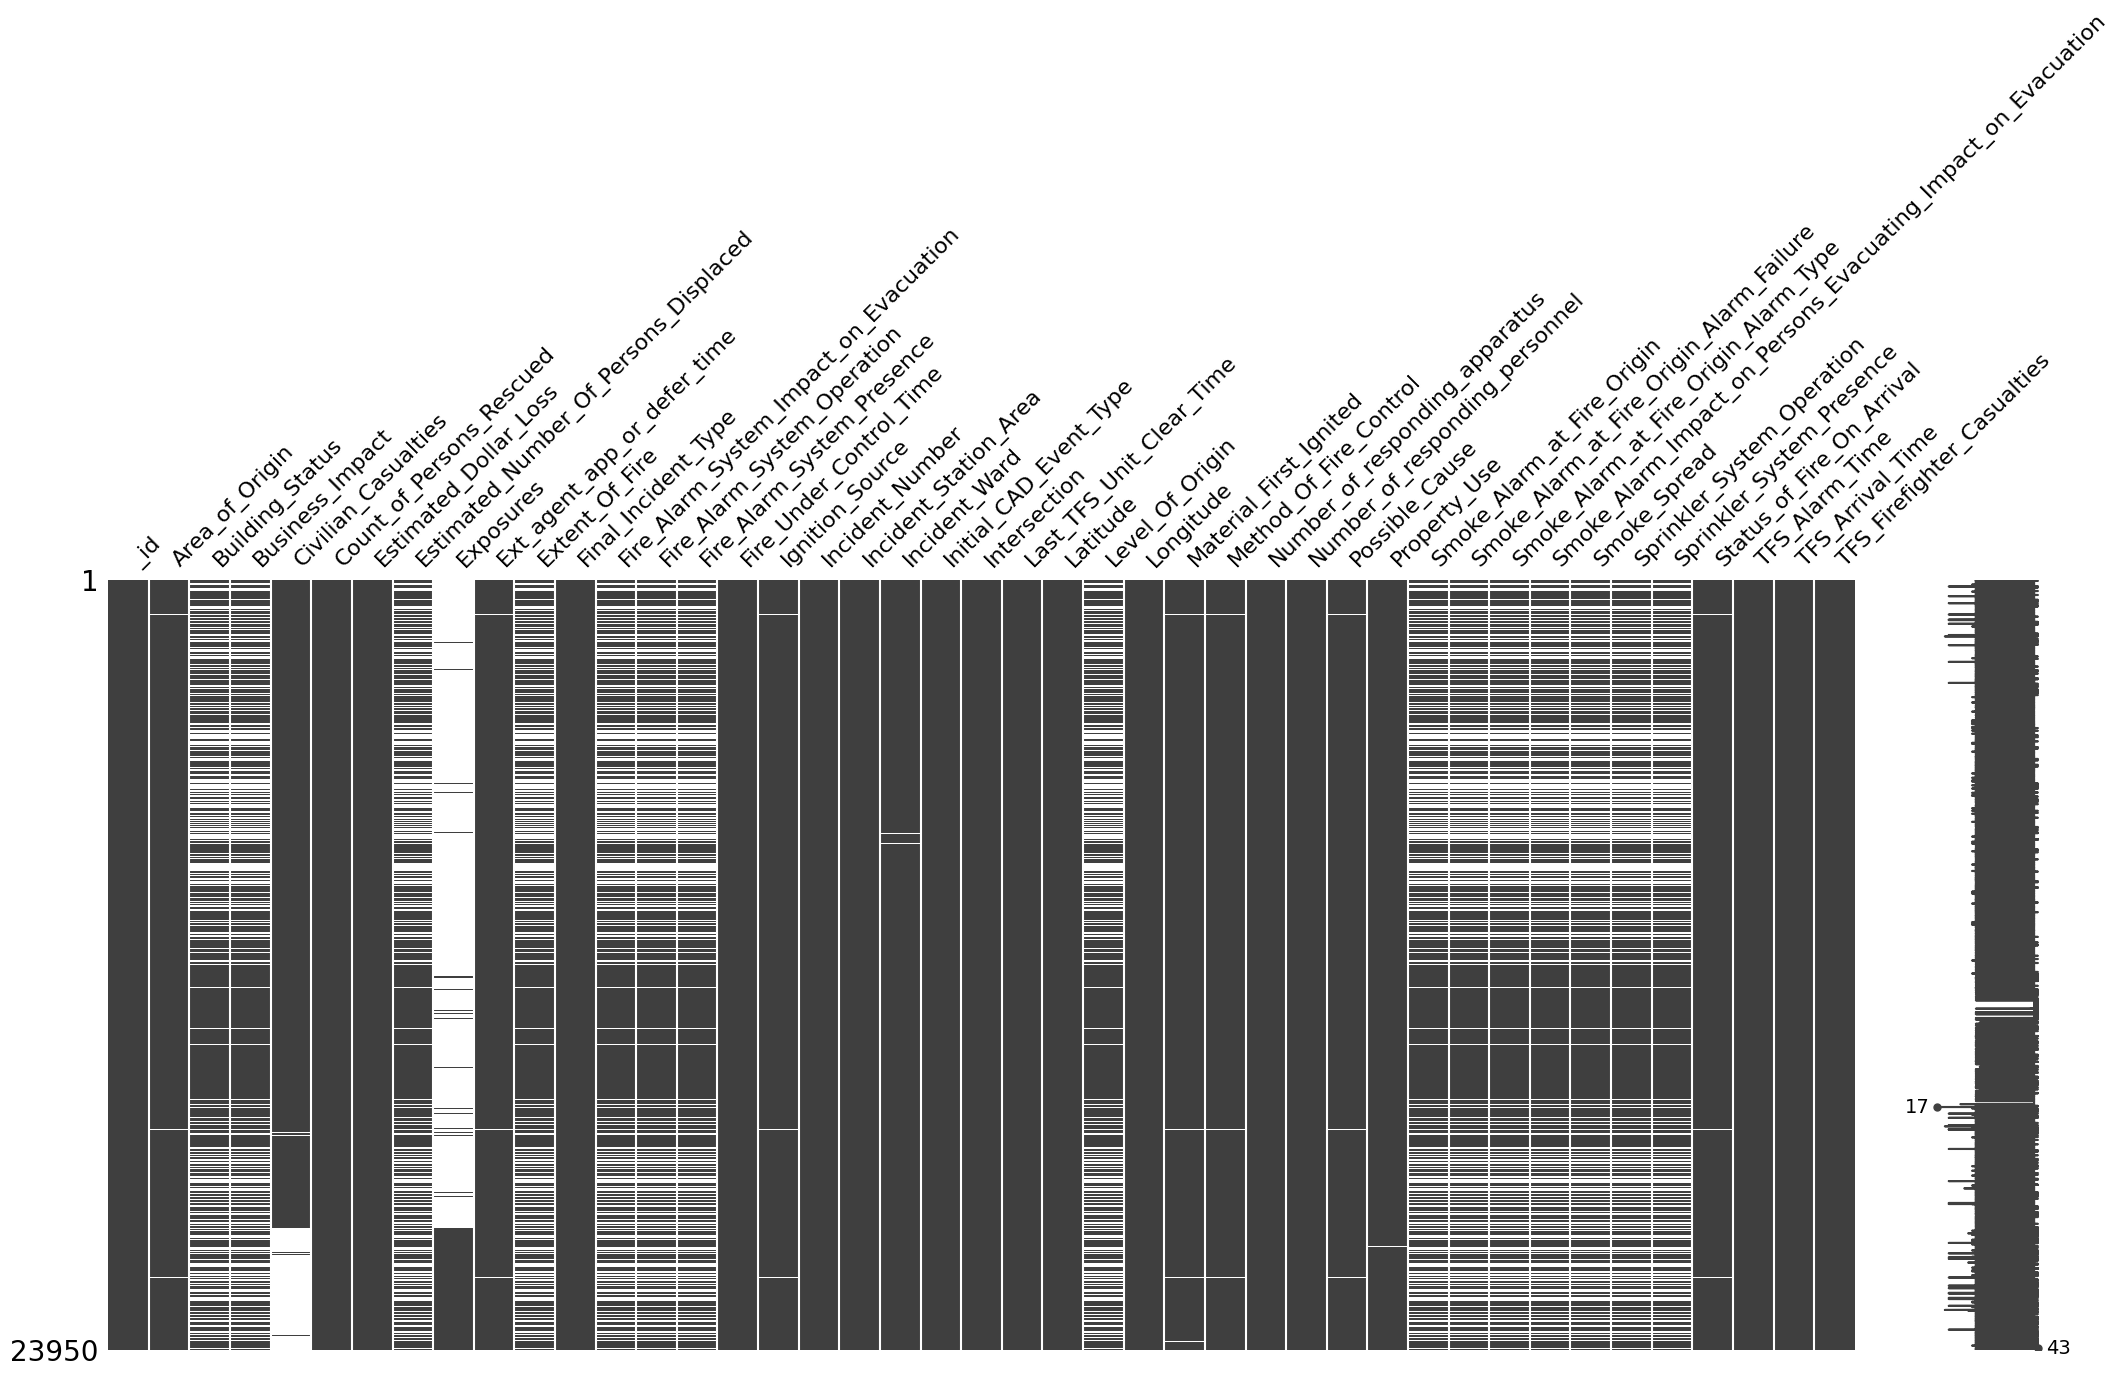

In [ ]:
msno.matrix(df_noNA)

<Axes: >

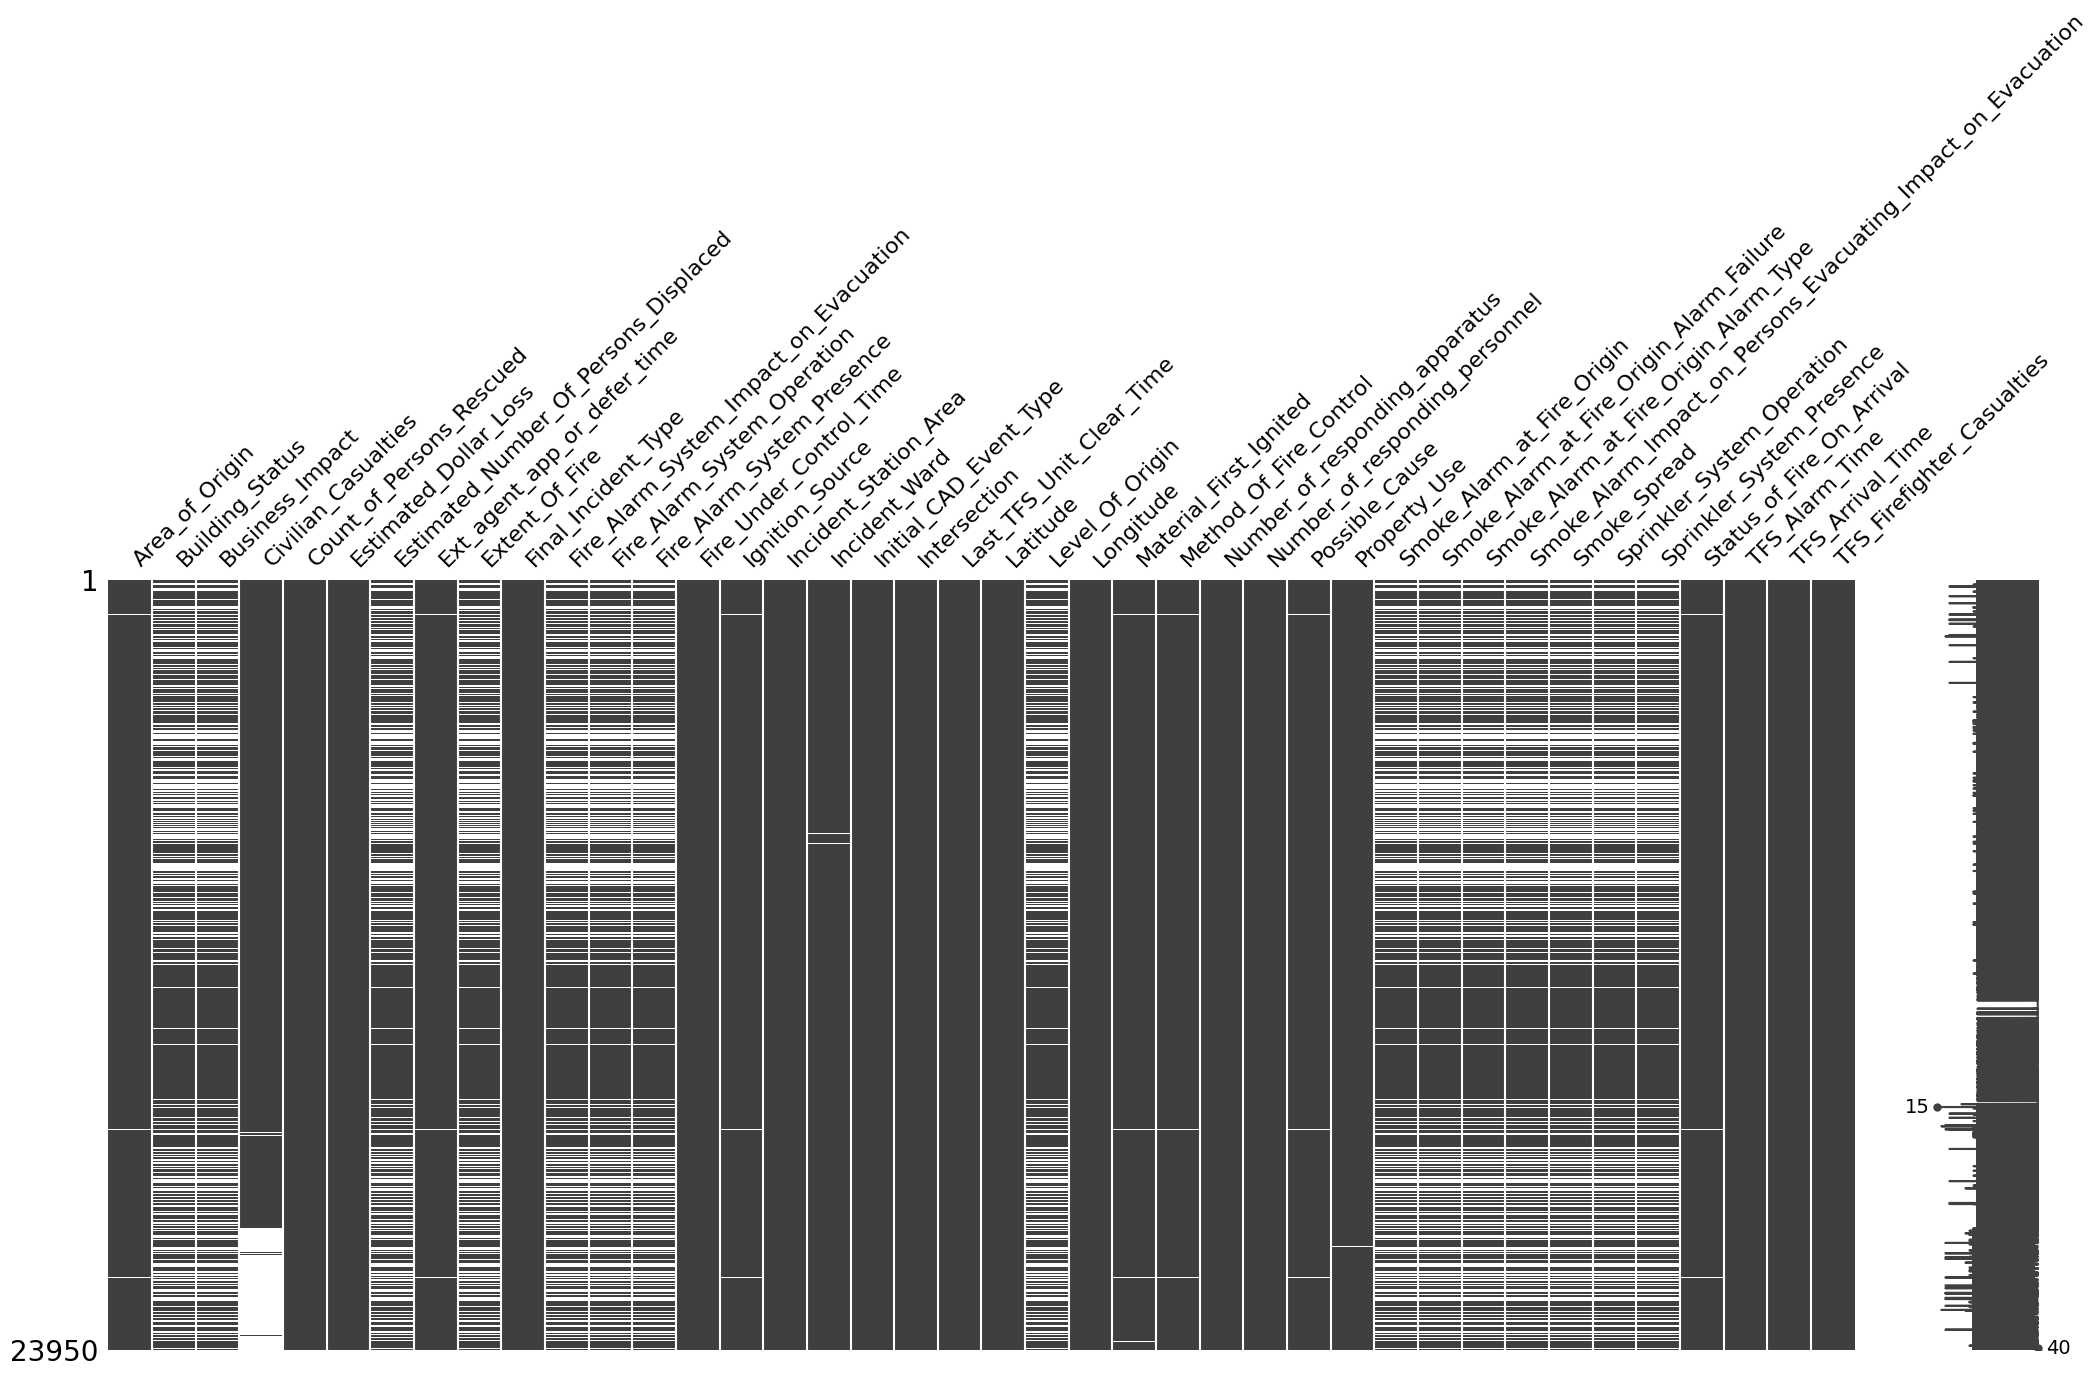

In [ ]:
df_dropped = df_noNA.drop(columns = ['_id','Incident_Number','Exposures'])
msno.matrix(df_dropped)

In [ ]:
# prompt: Just keep rows that in this column: df_dropped['Initial_CAD_Event_Type' they have a value that is present more than once

# Count occurrences of each value in 'Initial_CAD_Event_Type'
event_counts = df_dropped['Initial_CAD_Event_Type'].value_counts()

# Identify events that appear more than once
events_to_keep = event_counts[event_counts > 1].index

# Filter the DataFrame to keep only rows with those values
df_filtered = df_dropped[df_dropped['Initial_CAD_Event_Type'].isin(events_to_keep)]

df_filtered['Initial_CAD_Event_Type'].value_counts()

,count
Initial_CAD_Event_Type,
FIR,4909
VEF,2247
FIHR,2103
Fire - Residential,2099
FICI,1634
...,...
FIW,2
Carbon Monoxide - Medical Symptoms,2
CCA,2


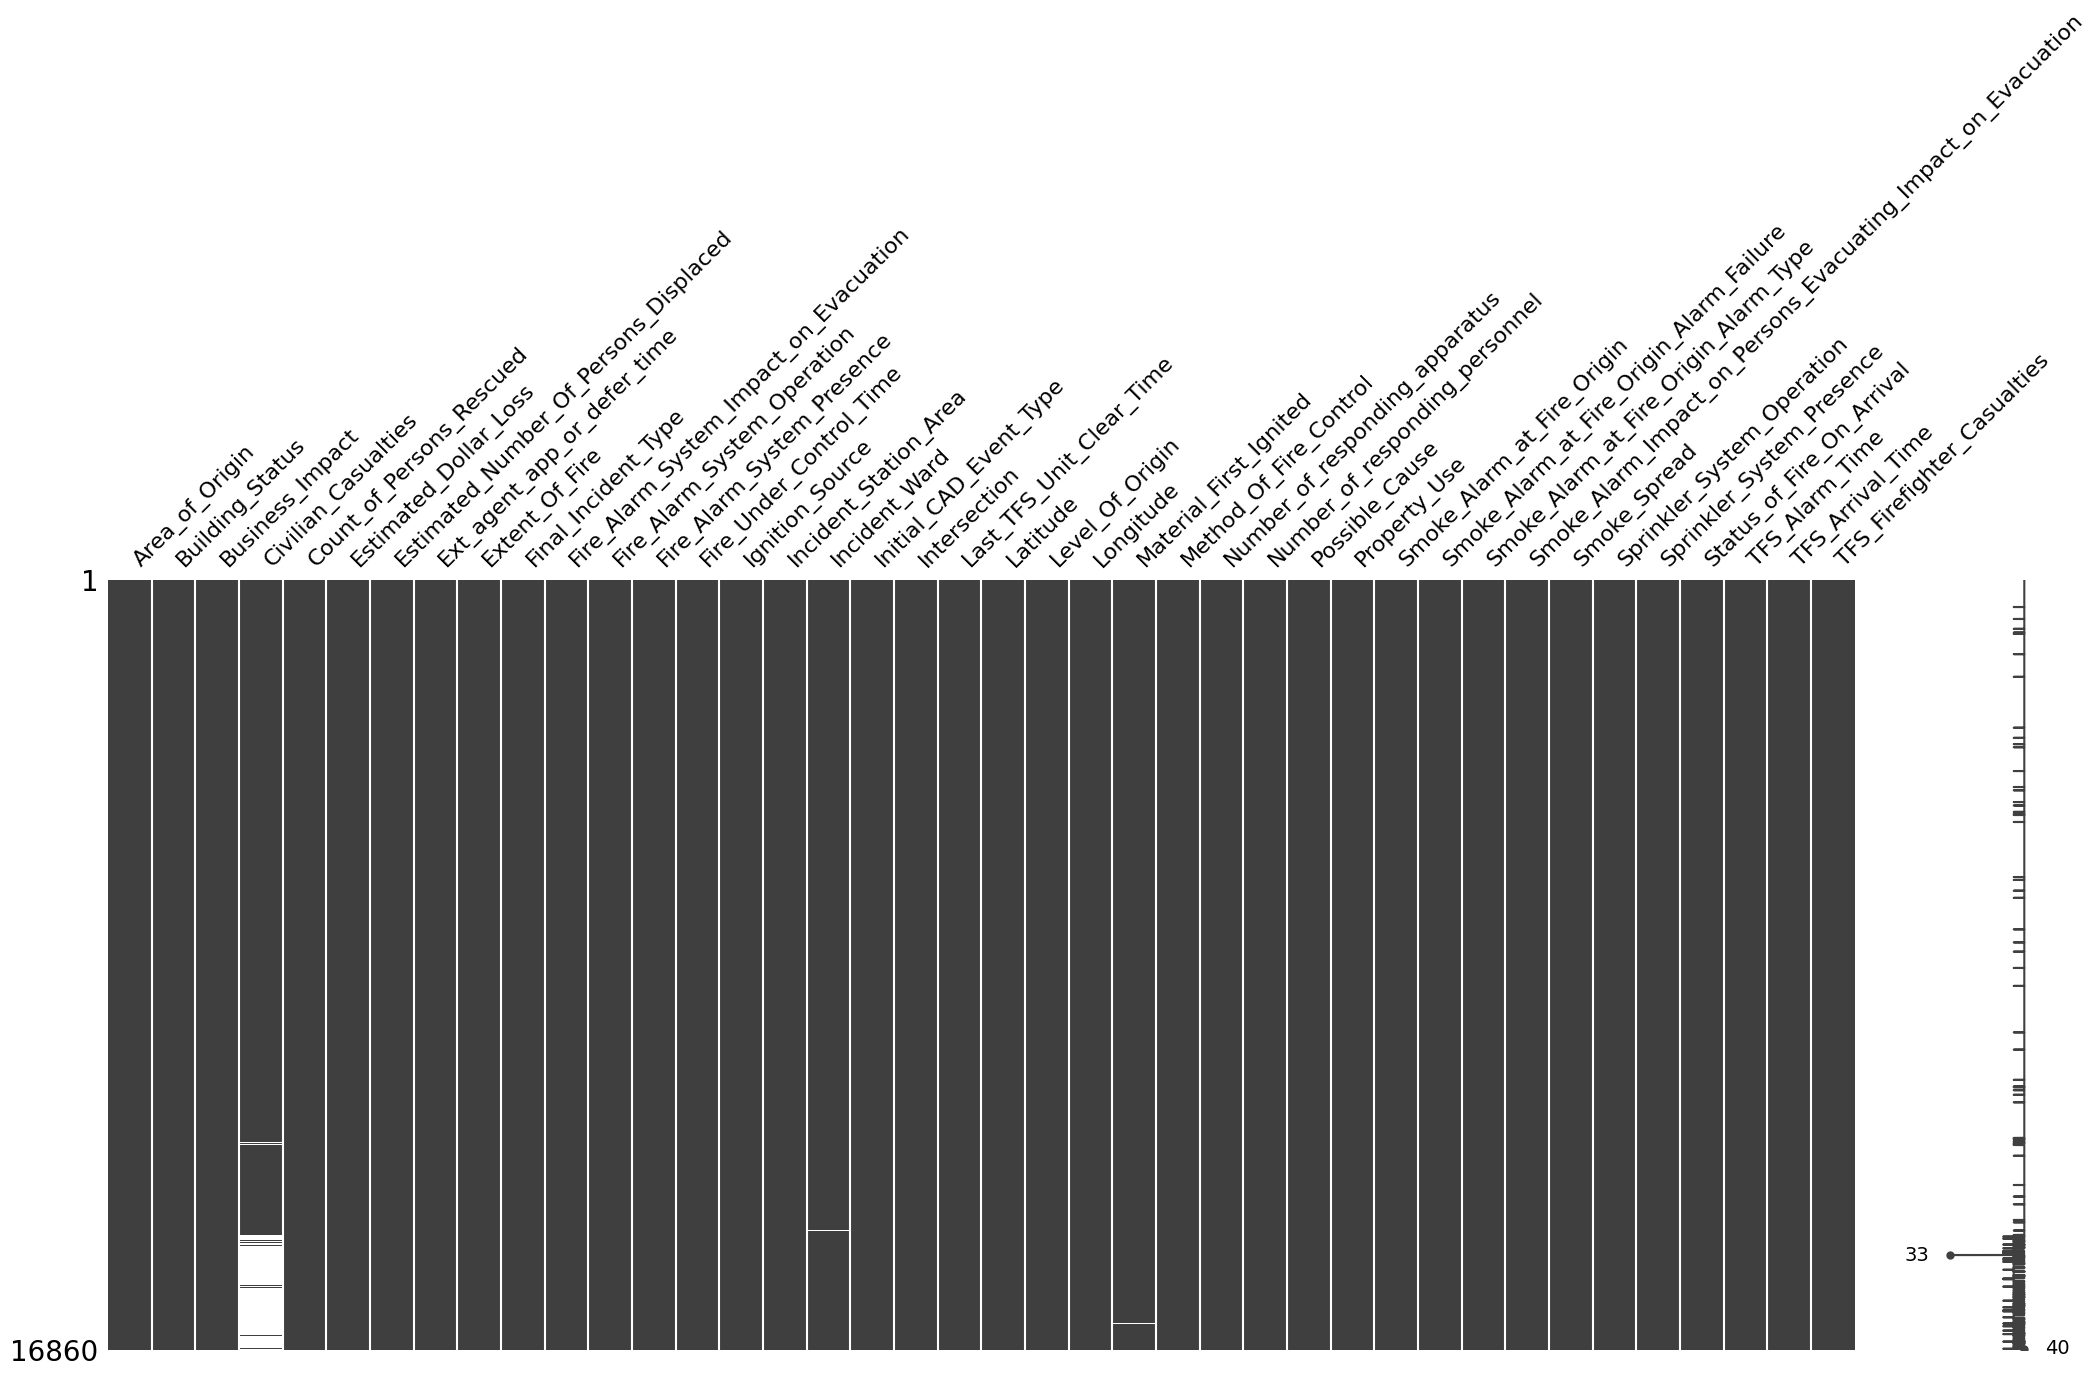

In [ ]:
#df_dropped.info()
df_alarm = df_dropped.dropna(subset = ['Fire_Alarm_System_Presence', 'Sprinkler_System_Presence'])
df_alarm.shape[0]
msno.matrix(df_alarm)
df_alarm = df_alarm.dropna()

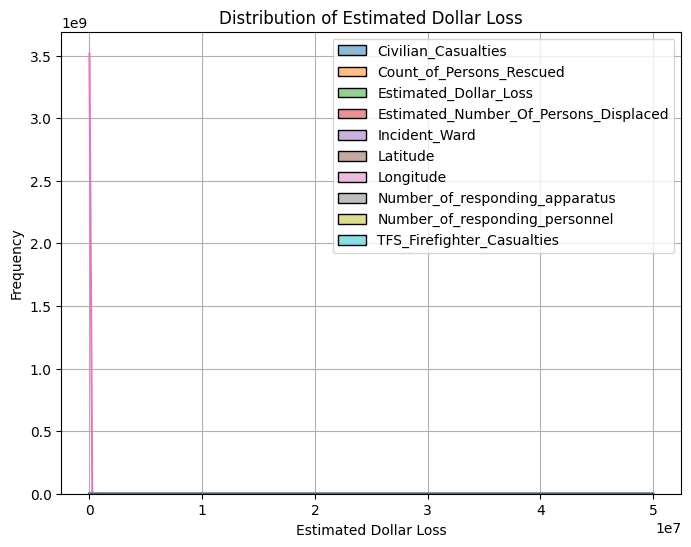

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the actual values in 'Estimated_Dollar_Loss'
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered[df_filtered['Estimated_Dollar_Loss']!=0], bins=30, kde=True, color='blue')

# Customize the plot
plt.title('Distribution of Estimated Dollar Loss')
plt.xlabel('Estimated Dollar Loss')
plt.ylabel('Frequency')
#plt.grid(True)

# Show the plot
plt.show()


#Making the imputed data file. no need to run for now

In [ ]:
#Remove columsn that are not

#These coloums are post fire so they have similar prediction methods: Business_Impact	Civilian_Casualties	Exposure Count_of_Persons_Rescued Estimated_Number_Of_Persons_Displaced

cols_to_keep = ['Estimated_Dollar_Loss','Incident_Category','Area_of_Origin','Building_Status','Extent_Of_Fire','Final_Incident_Type','Fire_Alarm_System_Impact_on_Evacuation',\
                'Fire_Alarm_System_Operation','Fire_Alarm_System_Presence','Ignition_Source','Level_Of_Origin','Material_First_Ignited','Method_Of_Fire_Control',\
                'Number_of_responding_personnel',	'Possible_Cause','Property_Use',	'Smoke_Alarm_at_Fire_Origin',	'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',	'Smoke_Alarm_at_Fire_Origin_Alarm_Type',\
                'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation',	'Smoke_Spread','Sprinkler_System_Operation','Sprinkler_System_Presence','Status_of_Fire_On_Arrival','TFS_Firefighter_Casualties','Response_Time_Seconds']
len(cols_to_keep)
df_relevant = df_clean_loss[cols_to_keep]
df_relevant.head()

,Estimated_Dollar_Loss,Incident_Category,Area_of_Origin,Building_Status,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,...,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Firefighter_Casualties,Response_Time_Seconds
0,15000.0,Vehicle,81 - Engine Area,Not relevant,2018-02-24T21:12:00,Not relevant,01 - Fire,Not relevant,Not relevant,Not relevant,...,Not relevant,Not relevant,Not relevant,Not relevant,Not relevant,Not relevant,Not relevant,"7 - Fully involved (total structure, vehicle, ...",0.0,342.0
1,50.0,Other,"75 - Trash, rubbish area (outside)",Not relevant,2018-02-24T21:29:42,Not relevant,01 - Fire,Not relevant,Not relevant,Not relevant,...,Not relevant,Not relevant,Not relevant,Not relevant,Not relevant,Not relevant,Not relevant,2 - Fire with no evidence from street,0.0,288.0
2,0.0,Business,"75 - Trash, rubbish area (outside)",01 - Normal (no change),2018-02-25T14:19:25,1 - Confined to object of origin,01 - Fire,9 - Undetermined,8 - Not applicable (no system),9 - Undetermined,...,9 - Floor/suite of fire origin: Smoke alarm pr...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",99 - Undetermined,8 - Not applicable - no sprinkler system present,9 - Undetermined,3 - Fire with smoke showing only - including v...,0.0,268.0
3,1500.0,Vehicle,81 - Engine Area,Not relevant,2018-02-25T18:38:00,Not relevant,01 - Fire,Not relevant,Not relevant,Not relevant,...,Not relevant,Not relevant,Not relevant,Not relevant,Not relevant,Not relevant,Not relevant,4 - Flames showing from small area (one storey...,0.0,238.0
4,2000.0,Residential,22 - Sleeping Area or Bedroom (inc. patients r...,01 - Normal (no change),2018-02-26T18:28:00,2 - Confined to part of room/area of origin,01 - Fire,"8 - Not applicable: No fire alarm system, no p...",8 - Not applicable (no system),8 - Not applicable (bldg not classified by OBC...,...,1 - Floor/suite of fire origin: No smoke alarm,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,7 - Not applicable: Occupant(s) first alerted ...,2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,0.0,352.0


In [ ]:
#Impute the data
#df_relevant.to_csv('df_relevant cols.csv', index=False)
df_imputed = df_relevant.copy()

# Fill NA values in categorical columns with "Not relevant"
categorical_cols = df_relevant.select_dtypes(include=['object', 'category']).columns
df_imputed[categorical_cols] = df_imputed[categorical_cols].fillna("Not relevant")

# Fill NA values in numerical columns with -100
numerical_cols = df_relevant.select_dtypes(include=['number']).columns
df_imputed[numerical_cols] = df_imputed[numerical_cols].fillna(-10)

# Verify changes
print(df_imputed.isnull().sum())

df_imputed.to_csv('df_imputed.csv', index=False)

Estimated_Dollar_Loss                                            0
Incident_Category                                                0
Area_of_Origin                                                   0
Building_Status                                                  0
Ext_agent_app_or_defer_time                                      0
Extent_Of_Fire                                                   0
Final_Incident_Type                                              0
Fire_Alarm_System_Impact_on_Evacuation                           0
Fire_Alarm_System_Operation                                      0
Fire_Alarm_System_Presence                                       0
Fire_Under_Control_Time                                          0
Ignition_Source                                                  0
Last_TFS_Unit_Clear_Time                                         0
Level_Of_Origin                                                  0
Material_First_Ignited                                        

<ipython-input-10-7c2988c49067>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant[categorical_cols] = df_relevant[categorical_cols].fillna("Not relevant")
<ipython-input-10-7c2988c49067>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant[numerical_cols] = df_relevant[numerical_cols].fillna(-100)


#Reading the imputed file and cleand it

In [ ]:
#Read the imputed file
import pandas as pd
df_imputed = pd.read_csv('df_imputed.csv')
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23641 entries, 0 to 23640
Data columns (total 26 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Estimated_Dollar_Loss                                          23641 non-null  int64 
 1   Incident_Category                                              23641 non-null  object
 2   Area_of_Origin                                                 23641 non-null  object
 3   Building_Status                                                23641 non-null  object
 4   Extent_Of_Fire                                                 23641 non-null  object
 5   Final_Incident_Type                                            23641 non-null  object
 6   Fire_Alarm_System_Impact_on_Evacuation                         23641 non-null  object
 7   Fire_Alarm_System_Operation                                    2364

In [ ]:
#Problematic categorical variables: Property_Use , Level_Of_Origin , Area_of_Origin , Ignition_Source, Material_First_Ignited

# Calculate value counts
value_counts = df_imputed['Property_Use'].value_counts()

# Calculate the share
value_share = value_counts / len(df_imputed)

# Create a new dataframe
share_df = value_share.reset_index()
share_df.columns = ['Property_Use', 'Share']

# Display the new dataframe
share_df.head(30)


,Property_Use,Share
0,323 - Multi-Unit Dwelling - Over 12 Units,0.198723
1,301 - Detached Dwelling,0.146018
2,901 - Automobile,0.090521
3,302 - Semi-Detached Dwelling,0.044287
4,"896 - Sidewalk, street, roadway, highway, hwy ...",0.041580
5,323 - Multi-Unit Dwelling Over 12 Units,0.039338
6,848 - Trash/Rubbish/Garbage Container or Dumpster,0.032190
7,"303 - Attached Dwelling (eg. rowhouse, townhou...",0.031428
8,"902 - Small Truck (eg. pick-up, van, etc.)",0.022334
9,321 - Multi-Unit Dwelling - 2 to 6 Units,0.014255


In [ ]:
df_imputed.shape
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23641 entries, 0 to 23640
Data columns (total 26 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Estimated_Dollar_Loss                                          23641 non-null  int64 
 1   Incident_Category                                              23641 non-null  object
 2   Area_of_Origin                                                 23641 non-null  object
 3   Building_Status                                                23641 non-null  object
 4   Extent_Of_Fire                                                 23641 non-null  object
 5   Final_Incident_Type                                            23641 non-null  object
 6   Fire_Alarm_System_Impact_on_Evacuation                         23641 non-null  object
 7   Fire_Alarm_System_Operation                                    2364

In [ ]:
#Remove outliers from Estimated Dollar loss and drop the NAs
#df.shape[0]
df_imputed = df_imputed.dropna(subset = 'Estimated_Dollar_Loss')

df_imputed = df_imputed[
    (df_imputed['Estimated_Dollar_Loss'] < 10000000.00) &
    ((df_imputed['Estimated_Dollar_Loss'] >= 10) | (df_imputed['Estimated_Dollar_Loss'] == 0))
]


# Cleaning categorical variables in imputed data

In [ ]:
#Making all the dataset lowercase
df_imputed.info()

# Loop through all columns with dtype 'object'
for col in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[col] = df_imputed[col].str.lower()

#Only for incident category
df_imputed['Incident_Category'] = df_imputed['Incident_Category'].str.title()

df_imputed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23641 entries, 0 to 23640
Data columns (total 26 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Estimated_Dollar_Loss                                          23641 non-null  int64 
 1   Incident_Category                                              23641 non-null  object
 2   Area_of_Origin                                                 23641 non-null  object
 3   Building_Status                                                23641 non-null  object
 4   Extent_Of_Fire                                                 23641 non-null  object
 5   Final_Incident_Type                                            23641 non-null  object
 6   Fire_Alarm_System_Impact_on_Evacuation                         23641 non-null  object
 7   Fire_Alarm_System_Operation                                    2364

,Estimated_Dollar_Loss,Incident_Category,Area_of_Origin,Building_Status,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,...,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Firefighter_Casualties,Response_Time_Seconds
0,15000,Vehicle,81 - engine area,not relevant,not relevant,01 - fire,not relevant,not relevant,not relevant,999 - undetermined,...,not relevant,not relevant,not relevant,not relevant,not relevant,not relevant,not relevant,"7 - fully involved (total structure, vehicle, ...",0,342
1,50,Other,"75 - trash, rubbish area (outside)",not relevant,not relevant,01 - fire,not relevant,not relevant,not relevant,999 - undetermined,...,not relevant,not relevant,not relevant,not relevant,not relevant,not relevant,not relevant,2 - fire with no evidence from street,0,288
2,1500,Vehicle,81 - engine area,not relevant,not relevant,01 - fire,not relevant,not relevant,not relevant,999 - undetermined,...,not relevant,not relevant,not relevant,not relevant,not relevant,not relevant,not relevant,4 - flames showing from small area (one storey...,0,238
3,7000,Vehicle,81 - engine area,not relevant,not relevant,01 - fire,not relevant,not relevant,not relevant,82 - vehicle - mechanical,...,not relevant,not relevant,not relevant,not relevant,not relevant,not relevant,not relevant,3 - fire with smoke showing only - including v...,0,192
4,10000,Vehicle,81 - engine area,not relevant,not relevant,01 - fire,not relevant,not relevant,not relevant,98 - other,...,not relevant,not relevant,not relevant,not relevant,not relevant,not relevant,not relevant,5 - flames showing from large area (more than ...,0,282


In [ ]:
#check if there is a relationshsip between Property_Use and Incident_Category

for type in df_imputed['Incident_Category'].unique():
  print(type)
  print(df_imputed[df_imputed['Incident_Category'] == type]['Property_Use'].value_counts().head(10))
  print("\n")

Vehicle
Property_Use
901 - automobile                                                                 1978
896 - sidewalk, street, roadway, highway, hwy (do not use for fire incidents)     745
902 - small truck (eg. pick-up, van, etc.)                                        475
837 - vehicles or vehicle parts                                                   215
903 - large truck (excluding truck trailer)                                       207
891 - outdoor general auto parking                                                192
999 - other vehicle                                                               131
906 - bus, trackless trolley                                                       74
904 - trailer combin. (e.g. auto trailer, small t&t, t&t, etc)                     68
301 - detached dwelling                                                            63
Name: count, dtype: int64


Other
Property_Use
323 - multi-unit dwelling - over 12 units                               

In [ ]:
import numpy as np

# Function to safely convert strings to integers if possible
def safe_int(value):
    try:
        return int(value)
    except ValueError:
        return value  # Return the original value if it's not convertible to int

# Apply safe_int to convert numeric strings to integers where needed
df_imputed['Level_Of_Origin'] = df_imputed['Level_Of_Origin'].apply(safe_int)

# Define conditions for Level_Of_Origin
conditions = [
    df_imputed['Level_Of_Origin'] == 996,  # Roof
    df_imputed['Level_Of_Origin'].isin([997, 998, 999]),  # Not relevant
    df_imputed['Level_Of_Origin'].apply(lambda x: isinstance(x, int) and x < 5),  # Low floor
    df_imputed['Level_Of_Origin'].apply(lambda x: isinstance(x, int) and x < 15),  # Mid floor
    df_imputed['Level_Of_Origin'].apply(lambda x: isinstance(x, int) and x >= 15),  # High floor
    df_imputed['Level_Of_Origin'].apply(lambda x: isinstance(x, str) and x.startswith('b'))  # Basement
]

# Define corresponding choices
choices = [
    "Roof",
    "Not relevant",
    "Low floor",
    "Mid floor",
    "High floor",
    "Basement"
]

# Apply np.select to update the column
df_imputed['Level_Of_Origin_Category'] = np.select(conditions, choices, default=df_imputed['Level_Of_Origin'])

#Drop the 'Level_Of_Origin' column
df_imputed = df_imputed.drop(columns=['Level_Of_Origin'])

# Verify the updated value counts
print(df_imputed['Level_Of_Origin_Category'].value_counts())


Level_Of_Origin_Category
Low floor       9738
not relevant    6987
Basement        2612
Mid floor       2022
Not relevant    1191
High floor       787
Roof             304
Name: count, dtype: int64


In [ ]:
df_imputed['Property_Use'].value_counts()

,count
Property_Use,
323 - multi-unit dwelling - over 12 units,4698
301 - detached dwelling,3452
901 - automobile,2140
302 - semi-detached dwelling,1047
"896 - sidewalk, street, roadway, highway, hwy (do not use for fire incidents)",983
...,...
115 - lecture hall,1
"691 - sto: tank, tank farm, other liquids",1
"135 - school - technical,industrial trade",1


In [ ]:
Property_Use_dict = {
    "group a: assembly": [
        "101 - theatre - motion picture",
        "102 - theatre - concert hall, live",
        "103 - tv, radio, motion picture studio",
        "104 - opera house",
        "111 - museum",
        "112 - art gallery",
        "113 - library",
        "114 - auditorium",
        "115 - lecture hall",
        "121 - bowling alley, billiard centre, pool hall",
        "122 - dance studio",
        "123 - community/exhibition/dance hall",
        "124 - sports/country/social/yacht club",
        "125 - gymnasium",
        "126 - non-residential club",
        "127 - casino",
        "128 - bingo hall",
        "131 - school - pre-elementary",
        "132 - school - elementary",
        "133 - school - secondary junior high (gr. 7 & 8)",
        "134 - school - secondary/senior high (gr. 9+)",
        "135 - school - technical, industrial trade",
        "136 - school - business, commerce, secretarial",
        "137 - school - post-secondary (university)",
        "138 - school - post-secondary (college)",
        "141 - airport, heliport",
        "142 - bus terminal",
        "143 - railway station",
        "144 - subway station",
        "145 - marine terminal",
        "151 - restaurants (occupant load greater than 30 persons, licensed)",
        "152 - bar, tavern, night club",
        "153 - church, other similar place of worship",
        "154 - funeral facility",
        "155 - legislative facility/building",
        "156 - court facility",
        "157 - day care centre",
        "158 - church hall",
        "161 - arena",
        "162 - ice rink",
        "163 - indoor swimming facility",
        "171 - theatre - drive-in",
        "172 - stadium",
        "173 - exhibition or amusement park structure",
        "174 - bleacher, grandstand, reviewing stand",
        "175 - tent or temporary structure for assembly",
        "199 - other assembly"
    ],
    "group b: care and detention": [
        "201 - jail, prison, penitentiary",
        "202 - reformatory (with detention quarters)",
        "203 - adult detention camp (minimum security)",
        "204 - police station (with detention quarters)",
        "205 - young offender detention facility",
        "206 - psych hospital (with detention quarters)",
        "211 - psychiatric hospital (without detention quarters)",
        "212 - public/private hospital",
        "216 - convalescent home or long-term care (excluding senior care)",
        "217 - infirmary",
        "218 - hospice",
        "219 - children custodial home",
        "222 - institute for the blind, deaf",
        "223 - seniors long-term care facility, licensed",
        "229 - other care facility",
        "231 - shelter for displaced/abused persons",
        "232 - halfway/transitional house",
        "233 - group home",
        "234 - retirement home",
        "299 - other care or detention not classified"
    ],
    "group c: residential": [
        "301 - detached dwelling",
        "302 - semi-detached dwelling",
        "303 - attached dwelling (e.g., rowhouse, townhouse, etc.)",
        "331 - apartment/flat/tenement with business",
        "332 - detached dwelling with business",
        "333 - semi-detached dwelling with business",
        "334 - attached dwelling with business",
        "335 - detached/semi/attached residence with accessory apartment above grade",
        "336 - detached/semi/attached residence with accessory apartment below grade",
        "311 - rooming/boarding house",
        "321 - multi-unit dwelling - 2 to 6 units",
        "322 - multi-unit dwelling - 7 to 12 units",
        "323 - multi-unit dwelling - over 12 units",
        "341 - motor home, camper, trailer",
        "342 - mobile home",
        "343 - tent",
        "344 - houseboat",
        "355 - hotel, motel, lodging - 4 or more guests or suites",
        "356 - hotel, motel, lodging - less than 4 guests or suites (inc. b&b)",
        "361 - school/college dormitory (detached from education facility)",
        "363 - military barrack",
        "364 - bunkhouse, workers barrack",
        "365 - detached garage",
        "366 - residential club (inc. sorority, fraternity)",
        "367 - hostel",
        "368 - residential camp",
        "369 - convent, monastery",
        "399 - other residential"
    ],
    "group d: business and personal services": [
        "401 - bank",
        "402 - post office",
        "403 - barber shop, hairdresser, beauty parlour, tanning salon",
        "404 - laundry, dry cleaner (inc. self-service)",
        "405 - general business office",
        "406 - police station (without detention quarters)",
        "407 - dental/medical office",
        "408 - animal hospital",
        "409 - radio station",
        "410 - technical/appliance rental/service establishment",
        "411 - fire station",
        "412 - engineering, architect or tech office",
        "413 - mailing, photocopy office",
        "414 - document centre, record repository (inc. archives)",
        "415 - computer, electronic data processing, records storage",
        "416 - furniture, upholstery repair without sales",
        "417 - shoe repair",
        "418 - tent or temporary structure for business or personal service activity",
        "498 - garage: general auto parking - structure",
        "499 - other business or personal services"
    ],
    "group e: mercantile": [
        "501 - restaurant (occupant load less than 30 persons)",
        "502 - supermarket, grocery store",
        "503 - specialty food store (butcher, deli, etc.)",
        "504 - convenience/variety store",
        "505 - liquor/wine/beer store",
        "506 - market - outdoors (flowers, fruit, etc.)",
        "507 - market - indoors (flowers, fruit, etc.)",
        "510 - mall - public area common to multi-store facility",
        "511 - department store",
        "512 - catalogue/mail order outlet",
        "521 - clothing store, accessories, fur",
        "522 - fabric store",
        "523 - furniture/appliance store",
        "524 - paint/wallpaper store",
        "525 - hardware store",
        "526 - building supply store",
        "527 - lumber yard",
        "528 - garden supply",
        "529 - book/stationery/art supply store",
        "530 - pharmacy",
        "531 - florist",
        "532 - hobby shop, sporting goods, music store",
        "533 - pet shop",
        "534 - video rental shop",
        "535 - computer/electronics store, service or repair",
        "536 - fireworks sales",
        "537 - rug, floor covering store",
        "538 - newsstand, bookstore",
        "539 - gifts, jewellery, leather goods, mixed goods",
        "541 - tent or temporary structure for mercantile activity",
        "543 - big box store",
        "599 - other mercantile"
    ],
    "group f: industrial": [
        "601 - motor vehicle sales",
        "602 - service station",
        "603 - motor vehicle repair garage",
        "604 - motor vehicle parts, accessory sales",
        "605 - car wash",
        "606 - watercraft sales",
        "607 - marina, marine service station",
        "609 - other vehicle sales/service",
        "611 - hydro generating plant",
        "612 - hydro distribution facility",
        "613 - gas processing plant",
        "614 - gas distribution facility",
        "615 - water works",
        "616 - water distribution facility",
        "617 - sanitary services (includes plant)",
        "618 - flammable liquid distribution facility",
        "619 - other utilities",
        "620 - heating plant - central/district heating plant, steam, etc.",
        "621 - mfg: petroleum products",
        "622 - mfg: chemicals, inc. hazardous chemicals",
        "623 - mfg: paint, varnishes, lacquers",
        "624 - mfg: drugs, cosmetics, pharmaceutical",
        "625 - mfg: rubber goods",
        "626 - mfg: asphalt products",
        "628 - mfg: coal products",
        "629 - mfg: other chemical/petroleum/paint/plastic products",
        "631 - mfg: meat/poultry/fish products",
        "632 - mfg: dairy goods, produce",
        "633 - mfg: grain products, bakery goods",
        "634 - mfg: alcoholic beverages",
        "635 - mfg: soft drinks",
        "636 - mfg: tobacco products",
        "637 - mfg: vegetable/animal oil products",
        "638 - mfg: sugar refining, sugar products",
        "639 - mfg: other agr/food/beverage/tabac",
        "640 - mfg: canning, preserving, processing fruits/vegetables",
        "641 - mfg: textile (e.g., preparing fibres, spinning, weaving)",
        "642 - mfg: tannery",
        "643 - mfg: footwear",
        "644 - mfg: wearing apparel",
        "645 - mfg: dry cleaning plant",
        "646 - mfg: floor covering and coated fabrics (excluding rubber, ceramic)",
        "649 - mfg: other textiles, clothing, leather goods",
        "651 - mfg: pulp/paper",
        "652 - mfg: primary processing (e.g., sawmill, plywood manufacturer, etc.)",
        "653 - mfg: secondary processing (e.g., finished goods, furniture, etc.)",
        "654 - mfg: printing, publishing (e.g., newspapers, magazines, books)",
        "655 - mfg: job printing (e.g., forms, greeting cards, etc.)",
        "659 - mfg: other wood, furniture, paper products, printing",
        "661 - mfg: road vehicles, parts",
        "662 - mfg: rail vehicles, parts",
        "663 - mfg: watercraft, parts",
        "664 - mfg: aircraft, parts",
        "665 - mfg: specialty vehicles, parts",
        "669 - mfg: other vehicles, parts",
        "671 - mfg: primary metal processing (e.g., refining, smelting, etc.)",
        "672 - mfg: secondary metal processing (e.g., rolling, drawing, polishing)",
        "673 - mfg: precision goods/instruments (e.g., surgical inst., cameras, etc.)",
        "674 - mfg: precious metals, jewellery",
        "675 - mfg: sporting goods, toys, bicycles",
        "676 - mfg: appliances, appliance parts",
        "677 - mfg: photo film processing (inc. motion and still)",
        "678 - mfg: glass and glass products, china, pottery",
        "679 - mfg: other metal/elect/misc. products",
        "681 - sto: petroleum products",
        "682 - sto: chemicals, inc. hazardous chemicals",
        "683 - sto: plastics",
        "684 - sto: paint, varnishes, lacquers",
        "685 - sto: drugs, cosmetics, pharmaceutical",
        "686 - sto: rubber goods",
        "687 - sto: asphalt products",
        "688 - sto: coal products",
        "689 - sto: medical supplies - cold storage",
        "690 - sto: tank, tank farm - flammable or combustible liquids/gases",
        "691 - sto: tank, tank farm - other liquids",
        "692 - sto: tank, tank farm - empty",
        "699 - sto: other chemical/petroleum/paint/plastic products",
        "701 - sto: meat/poultry/fish products",
        "702 - sto: dairy goods, produce",
        "703 - sto: grain products, bakery goods",
        "704 - sto: alcoholic beverages",
        "705 - sto: soft drinks",
        "706 - sto: tobacco products",
        "707 - sto: vegetable/animal oil products",
        "708 - sto: sugar refining, sugar products",
        "709 - sto: cold storage - processed food",
        "710 - sto: cold storage - beverages",
        "721 - sto: textiles",
        "722 - sto: footwear",
        "723 - sto: wearing apparel",
        "724 - sto: dry cleaning plant",
        "725 - sto: cold storage",
        "731 - sto: pulp, paper",
        "732 - sto: primary products (e.g., plywood, lumber, etc.)",
        "733 - sto: secondary products (e.g., finished goods, furniture, etc.)",
        "734 - sto: printing, publishing",
        "735 - sto: job printing (e.g., forms, greeting cards, etc.)",
        "739 - sto: other wood, furniture, paper products, printing",
        "741 - sto: road vehicles, parts",
        "742 - sto: rail vehicles, parts",
        "743 - sto: watercraft, parts",
        "744 - sto: aircraft, parts",
        "745 - sto: specialty vehicles, parts",
        "749 - sto: other vehicles, parts",
        "751 - sto: primary metal products (e.g., ingots, bars, etc.)",
        "752 - sto: secondary metal products",
        "753 - sto: precision goods/instruments",
        "754 - sto: precious metals/jewellery",
        "755 - sto: sporting goods/toys",
        "756 - sto: appliances, appliance parts",
        "759 - sto: other metal/electrical/miscellaneous products",
        "760 - sto: warehouse, variety of items, not classified by codes",
        "761 - sto: glass & glass products, pottery, chinaware",
        "769 - sto: tent or temporary structure for industrial storage",
        "791 - recycling facility",
        "792 - waste transfer station",
        "793 - laboratory",
        "794 - aircraft hangar",
        "796 - wind turbine",
        "799 - other industrial"
    ],
    "vehicles": [
        "901 - automobile",
        "902 - small truck (e.g., pickup, van, etc.)",
        "903 - large truck (excluding truck trailer)",
        "904 - trailer combos (e.g., auto trailer, small t&t, etc.)",
        "905 - motorcycle",
        "906 - bus, trackless trolley",
        "907 - emergency vehicle",
        "909 - multiple road vehicles"
    ]
}

def classify_item(item):
    # Iterate through the global Property_Use_dict using different loop variables
    for category, items in Property_Use_dict.items():
        if item in items:
            return category
    return 'Unknown'  # Default for items not in the dictionary

# Apply classification to the DataFrame
df_imputed['Property_Use_Category'] = df_imputed['Property_Use'].apply(classify_item)

#Drop Property_Use column
df_imputed = df_imputed.drop(columns=['Property_Use'])

# Check the result
df_imputed['Property_Use_Category'].value_counts()

,count
Property_Use_Category,
group c: residential,10213
Unknown,7964
vehicles,2539
group a: assembly,943
group f: industrial,803
group e: mercantile,532
group d: business and personal services,387
group b: care and detention,260


In [ ]:
df_imputed['Material_First_Ignited'].value_counts()

,count
Material_First_Ignited,
99 - undetermined (formerly 98),3089
"46 - rubbish, trash, waste",2244
"74 - cooking oil, grease",1753
47 - vehicle,1622
43 - electrical wiring insulation,1349
...,...
40 - christmas tree,14
"53 - agricultural product - other (eg pesticide, fertilizer)",10
73 - alcohol (methanol),9


In [ ]:

Material_First_Ignited_dict = {
    "building component": [
        "11 - exterior roof covering",
        "12 - exterior cladding (excluding roof)",
        "13 - floor",
        "14 - interior wall/ceiling",
        "15 - structural member",
        "16 - insulation",
        "19 - other building component",
        "building component"
    ],
    "furniture": [
        "21 - upholstered sofa, chair, etc.",
        "22 - non-upholstered chair, etc.",
        "23 - cabinetry",
        "29 - other furniture",
         "furniture"
    ],
    "soft goods, wearing apparel": [
        "31 - mattress, pillow",
        "32 - bedding",
        "33 - linen other than bedding",
        "34 - wearing apparel on a person",
        "35 - curtain, drapery",
        "36 - rug, carpet",
        "39 - other soft goods, wearing apparel",
        "soft goods, wearing apparel"
    ],
    "other objects": [
        "40 - christmas tree",
        "41 - books, magazines, newspapers",
        "42 - cleaning supplies",
        "43 - electrical wiring insulation",
        "44 - creosote (chimney, flue pipe)",
        "45 - nest",
        "46 - rubbish, trash, waste",
        "47 - vehicle",
        "48 - multiple objects or materials",
        "other objects"
    ],
    "materials": [
        "51 - bush, grass, tree, leaves, etc.",
        "52 - agricultural product - grown (e.g. straw, seeds, etc.)",
        "53 - agricultural product - other (e.g. pesticide, fertilizer)",
        "54 - plastic",
        "55 - wood, wood shavings",
        "56 - paper, cardboard",
        "57 - fabric - natural (e.g. cotton, wool, etc.)",
        "58 - fabric - synthetic, combination",
        "59 - asphalt, tar product",
        "materials"
    ],
    "gases": [
        "61 - propane",
        "62 - natural gas",
        "63 - hydrogen",
        "69 - other gases",
        "gases"
    ],
    "flammable, combustible liquids": [
        "71 - gasoline",
        "72 - diesel fuel/fuel oil",
        "73 - alcohol (methanol)",
        "74 - cooking oil, grease",
        "75 - stored paint, varnish",
        "79 - other flammable, combustible liquid",
        "flammable, combustible liquids"
    ],
    "other materials": [
        "81 - rubber, not classified above",
        "82 - oxidizing material (inc bleach, peroxide)",
        "83 - oily rags (inc. paint rags, etc)",
        "86 - pyrophoric metals",
        "87 - other chemicals, not classified above",
        "other materials"
    ],
    "miscellaneous": [
        "96 - multiple diverse objects ignited",
        "97 - other",
        "99 - undetermined",
        "miscellaneous"
    ]
}

def classify_item(item):
    # Iterate through the global Material_First_Ignited_dict using different loop variables
    for category, items in Material_First_Ignited_dict.items():
        if item in items:
            return category
    return 'Unknown'  # Default for items not in the dictionary

# Apply classification to the DataFrame
df_imputed['Material_First_Ignited_Category'] = df_imputed['Material_First_Ignited'].apply(classify_item)

#Drop the old column
df_imputed = df_imputed.drop(columns=['Material_First_Ignited'])

# Check the result
df_imputed['Material_First_Ignited_Category'].value_counts()


,count
Material_First_Ignited_Category,
other objects,7240
Unknown,4284
miscellaneous,2490
"flammable, combustible liquids",2382
materials,2361
building component,1746
"soft goods, wearing apparel",1553
furniture,1192
gases,214


In [ ]:
df_imputed['Ignition_Source'].value_counts()

,count
Ignition_Source,
999 - undetermined,6836
"11 - stove, range-top burner",2683
"71 - smoker's articles (eg. cigarettes, cigars, pipes already ignited",2256
81 - vehicle - electrical,1569
82 - vehicle - mechanical,1024
...,...
"101 - exposure, source structure detached",6
61 - incinerator,6
"46 - electric blanket, heating pad",6


In [ ]:
df_imputed['Ignition_Source'].value_counts()

,count
Ignition_Source,
999 - undetermined,6836
"11 - stove, range-top burner",2683
"71 - smoker's articles (eg. cigarettes, cigars, pipes already ignited",2256
81 - vehicle - electrical,1569
82 - vehicle - mechanical,1024
...,...
"101 - exposure, source structure detached",6
61 - incinerator,6
"46 - electric blanket, heating pad",6


In [ ]:
Ignition_Source_Dict = {
    'miscellaneous': [
        '85 - vehicle collision',
        '88 - multiple ignition source or igniting equipment (suspected arson)',
        '90 - explosives',
        '91 - fireworks',
        '92 - open fire (e.g., campfire, rubbish fire, etc.)',
        '93 - hot ashes, embers, spark',
        '94 - static electricity (spark)',
        '95 - lightning',
        '96 - chemical reaction (e.g., spontaneous combustion, etc.)',
        '97 - rekindle',
        '98 - other, not classified',
        '100 - outdoor fireplace/heater'
    ],
    'exposure': [
        '101 - exposure, source structure detached',
        '102 - exposure, source structure semi-detached or attached',
        '103 - exposure, source outside storage container, tank',
        '104 - exposure, source open fire (including campfire, rubbish fire)',
        '105 - exposure, source forest, trees, wildland',
        '106 - exposure, source grass, shrubs, bush',
        '107 - exposure, source vehicle (outside structure)',
        '108 - exposure, source other',
        '999 - undetermined'
    ],
    'processing equipment': [
        '61 - incinerator',
        '62 - heat treatment equipment (furnace, oven, kiln, quench tanks, etc.)',
        '63 - painting equipment',
        '64 - chemical processing equipment (e.g., reactors, distilling unit)',
        '69 - other processing equipment'
    ],
     "open flame tools, smokers' articles": [
        "71 - smokers' articles (e.g., lit cigarettes, pipes not matches or lighters)",
        "72 - cutting/welding equipment",
        "73 - blow torch, bunsen burner",
        "74 - salamander",
        "75 - matches (open flame)",
        "76 - lighters (open flame)",
        "77 - matches or lighters (unable to distinguish)",
        "79 - other open flame tools/smokers' articles"
     ],
    'other mechanical, electrical': [
        '80 - portable generator',
        '81 - vehicle - electrical',
        '82 - vehicle - mechanical',
        '83 - other electrical',
        '84 - other mechanical'
    ],
     'appliances': [
        '42 - television, radio, stereo, tape recorder, etc.',
        '43 - clothes dryer',
        '44 - iron, pressing machine',
        '45 - washing machine',
        '46 - electric blanket, heating pad',
        '47 - refrigerator, freezer (including vending machine)',
        '48 - air conditioner - window or room unit',
        '49 - other appliances'
    ],
     'lighting equipment': [
        '51 - incandescent lamp - light bulb, spotlight',
        '52 - florescent lamp - bulb or tube (includes ballast)',
        '53 - christmas lights, decorative lighting',
        '54 - lamp (e.g., coal, oil, naphtha, etc.)',
        '55 - candle',
        '56 - halogen lamp or light',
        '59 - other lighting equipment'
    ],
    'heating equipment, chimney etc.': [
        '17 - wood burning stove',
        '31 - central heating/cooling unit',
        '32 - water heater',
        '33 - space heater - fixed',
        '34 - space heater - portable',
        '35 - fireplace - factory built',
        '36 - fireplace - masonry',
        '37 - fireplace insert',
        '38 - chimney - factory built',
        '39 - chimney - masonry',
        '40 - flue pipe',
        '41 - other heating equipment'
    ],
    'electrical distribution equipment': [
        '20 - service/utility lines (includes power/hydro transmission lines)',
        '21 - transformer',
        '22 - meter',
        '23 - distribution equipment (includes panel boards, fuses, circuits)',
        '24 - circuit wiring - copper (includes conductors)',
        '25 - circuit wiring - aluminum (includes conductors)',
        '26 - terminations - copper (includes receptacles, switches, lights)',
        '27 - terminations - aluminum (includes receptacles, switches, lights)',
        '28 - cord, cable for appliance, electrical articles',
        '29 - extension cord, temporary wiring',
        '30 - other electrical distribution item'
    ],
     'cooking equipment': [
        '11 - stove, range-top burner',
        '12 - oven',
        '13 - microwave',
        '14 - open fired barbeque - fixed or portable',
        '15 - range hood',
        '16 - deep fat fryer',
        '19 - other cooking items (e.g., toaster, kettle, electric frying pan)'
    ]
}


def classify_item(item):
    # Use the global Ignition_Source_Dict instead of a local variable
    for category, items in Ignition_Source_Dict.items():  # Change to Ignition_Source_Dict
        if item in items:
            return category
    return 'Unknown'  # Default for items not in the dictionary

# Apply classification to the DataFrame
df_imputed['Ignition_Source_Category'] = df_imputed['Ignition_Source'].apply(classify_item)

#Drop the old column
df_imputed = df_imputed.drop(columns=['Ignition_Source'])

df_imputed['Ignition_Source_Category'].value_counts()


,count
Ignition_Source_Category,
exposure,6915
Unknown,4424
cooking equipment,3817
"other mechanical, electrical",3179
"open flame tools, smokers' articles",1312
electrical distribution equipment,1173
"heating equipment, chimney etc.",792
appliances,715
lighting equipment,647


In [ ]:
df_imputed['Area_of_Origin'].value_counts()

,count
Area_of_Origin,
24 - cooking area or kitchen,4042
81 - engine area,2985
"44 - trash, rubbish storage (inc garbage chute room, garbage/industri",1559
64 - porch or balcony,1496
"22 - sleeping area or bedroom (inc. patients room, dormitory, etc)",1305
...,...
"34 - operating room, treatment or examination area",9
54 - incinerator room,4
76 - fuel dispensing area (outside),3


In [ ]:
Area_of_Origin_dict = {
   "means of egress": [
        "11 - lobby, entranceway",
        "12 - hallway, corridor",
        "13 - stairway, escalator",
        "18 - covered court, atrium, mall concourse",
        "19 - other means of egress"
    ],
    "functional area": [
        "21 - living area (e.g. living, t.v., recreation, etc)",
        "22 - sleeping area or bedroom (inc. patient's room, dormitory, etc)",
        "23 - dining or beverage area (inc. lunchroom, café, mess, etc)",
        "24 - cooking area or kitchen",
        "25 - washroom or bathroom (inc. locker rooms)",
        "26 - sauna",
        "27 - laundry area",
        "28 - office",
        "29 - electronic equipment area",
        "30 - sales, showroom area",
        "31 - process manufacturing (inc. product assembly, repair, etc)",
        "32 - assembly area (inc. school room, spectator area, church, etc)",
        "33 - laboratory",
        "34 - operating room, treatment or examination area",
        "35 - performance area (inc. stage, rink, boxing ring, gym floor, etc)",
        "36 - backstage, dressing room",
        "39 - other functional area"
    ],
    "storage area": [
        "41 - closet (e.g. clothes, broom, linen, etc)",
        "42 - garage",
        "43 - locker (apartment storage)",
        "44 - trash, rubbish storage (inc. chute room, industrial waste area, etc)",
        "45 - supply storage room (inc. maintenance/document storage, etc)",
        "46 - product storage (inc. products to be assembled, sold, shipped, etc)",
        "47 - shipping/receiving/loading platform",
        "48 - records storage area (inc. vaults)",
        "49 - other storage area"
    ],
    "building services/support facilities": [
        "51 - elevator (includes shaft)",
        "52 - hvac equipment room (furnace room, water heater closet, boiler)",
        "53 - chimney/flue pipe",
        "54 - incinerator room",
        "55 - mechanical/electrical services room",
        "56 - conv. shaft or chute (inc. dumbwaiter, laundry/garbage chute)",
        "57 - ducting - heating, air conditioning",
        "58 - ducting - exhaust (inc. cooking, fumes, etc)",
        "59 - utility shaft (e.g. electrical wiring/phone, etc)",
        "60 - other building services/support facilities"
    ],
    "structural area": [
        "50 - basement/cellar not partitioned",
        "61 - exterior wall",
        "62 - roof",
        "63 - awning or canopy",
        "64 - porch or balcony",
        "65 - crawl space (includes sub-structure)",
        "66 - concealed ceiling area",
        "67 - concealed floor area",
        "68 - concealed wall area",
        "69 - attic area",
        "70 - other structural area"
    ],
    "outside area": [
        "71 - open area (inc. lawn, field, farmyard, park, playing field)",
        "72 - court, patio, terrace",
        "73 - parking area, parking lot",
        "74 - storage area (outside)",
        "75 - trash, rubbish area (outside)",
        "76 - fuel dispensing area (outside)",
        "78 - attached deck",
        "79 - other outside area"
    ],
    "vehicle areas": [
        "81 - engine area",
        "82 - running gear (e.g. wheels and braking systems, transmission)",
        "83 - electrical systems",
        "84 - fuel systems (e.g. fuel tank, etc)",
        "85 - operator/control area",
        "86 - passenger area",
        "87 - trunk/cargo area",
        "89 - other vehicle area"
    ],
    "miscellaneous": [
        "91 - multiple areas of origin",
        "92 - residential/business: restaurant area",
        "93 - residential/business: other business area",
        "97 - other - unclassified",
        "99 - undetermined"
    ]
}


def classify_item(item):
    # Iterate through the global Area_of_Origin_dict using different loop variables
    for category, items in Area_of_Origin_dict.items():
        if item in items:
            return category
    return 'Unknown'  # Default for items not in the dictionary

# Apply classification to the DataFrame
df_imputed['Area_of_Origin_Category'] = df_imputed['Area_of_Origin'].apply(classify_item)

#Drop the old column
df_imputed = df_imputed.drop(columns=['Area_of_Origin'])

# Check the result
df_imputed['Area_of_Origin_Category'].value_counts()


,count
Area_of_Origin_Category,
Unknown,6728
functional area,4856
vehicle areas,4690
structural area,2474
outside area,2002
storage area,860
building services/support facilities,733
miscellaneous,684
means of egress,614


In [ ]:
df_imputed['Possible_Cause'].value_counts()

,count
Possible_Cause,
99 - undetermined,3987
52 - electrical failure,3152
45 - improperly discarded,2194
44 - unattended,1921
"60 - other unintentional cause, not classified",1580
"98 - unintentional, cause undetermined",1276
other unintended cause,1258
47 - improper handling of ignition source or ignited material,1085
misuse of ignition source/material ignited,953


In [ ]:
Possible_Cause_dict = {
    "intentional": [
        "1 - suspected arson",
        "2 - riot/civil commotion",
        "3 - suspected vandalism",
        "4 - suspected youth vandalism (ages 12 to 17)"
    ],
    "unintentional": [
        "11 - children playing (ages 11 and under)",
        "12 - vehicle collision"
    ],
    "design/construction/maintenance deficiency": [
        "20 - design/construction/installation/maintenance deficiency",
        "21 - routine maintenance deficiency, e.g., creosote, lint, grease buildup"
    ],
    "misuse of ignition source/material ignited": [
        "44 - unattended",
        "45 - improperly discarded",
        "46 - used or placed too close to combustibles",
        "47 - improper handling of ignition source or ignited material",
        "48 - used for purpose not intended",
        "49 - improper storage",
        "50 - other misuse of ignition source/material ignited"
    ],
    "mechanical/electrical failure": [
        "51 - mechanical failure",
        "52 - electrical failure"
    ],
    "other unintentional": [
        "60 - other unintentional cause, not classified"
    ],
    "other": [
        "72 - rekindle",
        "73 - natural cause",
        "80 - exposure fire"
    ],
    "undetermined": [
        "98 - unintentional, cause undetermined",
        "99 - undetermined"
    ]
}


def classify_item(item):
    # Iterate through the global Possible_Cause_dict using different loop variables
    for category, items in Possible_Cause_dict.items():
        if item in items:
            return category
    return 'Unknown'  # Default for items not in the dictionary

# Apply classification to the DataFrame
df_imputed['Possible_Cause_Category'] = df_imputed['Possible_Cause'].apply(classify_item)

#Drop the old column
df_imputed = df_imputed.drop(columns=['Possible_Cause'])

# Check the result
df_imputed['Possible_Cause_Category'].value_counts()


,count
Possible_Cause_Category,
misuse of ignition source/material ignited,6364
Unknown,5520
undetermined,5263
mechanical/electrical failure,4023
other unintentional,1580
design/construction/maintenance deficiency,708
other,96
unintentional,87


In [ ]:
df_imputed.shape[0]
df_imputed.to_csv('df_imputed_final.csv', index=False)

# RUN predicting MODELS

In [ ]:
import pandas as pd
df_final = pd.read_csv('df_imputed_final.csv')

In [ ]:
df_final.head()

,Estimated_Dollar_Loss,Incident_Category,Building_Status,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Method_Of_Fire_Control,Number_of_responding_personnel,...,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Firefighter_Casualties,Response_Time_Seconds,Level_Of_Origin_Category,Property_Use_Category,Material_First_Ignited_Category,Ignition_Source_Category,Area_of_Origin_Category,Possible_Cause_Category
0,15000,Vehicle,not relevant,not relevant,01 - fire,not relevant,not relevant,not relevant,1 - extinguished by fire department,4,...,not relevant,"7 - fully involved (total structure, vehicle, ...",0,342,not relevant,Unknown,other objects,exposure,vehicle areas,undetermined
1,50,Other,not relevant,not relevant,01 - fire,not relevant,not relevant,not relevant,1 - extinguished by fire department,4,...,not relevant,2 - fire with no evidence from street,0,288,not relevant,Unknown,miscellaneous,exposure,outside area,Unknown
2,1500,Vehicle,not relevant,not relevant,01 - fire,not relevant,not relevant,not relevant,1 - extinguished by fire department,25,...,not relevant,4 - flames showing from small area (one storey...,0,238,not relevant,Unknown,other objects,exposure,vehicle areas,undetermined
3,7000,Vehicle,not relevant,not relevant,01 - fire,not relevant,not relevant,not relevant,1 - extinguished by fire department,4,...,not relevant,3 - fire with smoke showing only - including v...,0,192,not relevant,vehicles,other objects,"other mechanical, electrical",vehicle areas,undetermined
4,10000,Vehicle,not relevant,not relevant,01 - fire,not relevant,not relevant,not relevant,1 - extinguished by fire department,4,...,not relevant,5 - flames showing from large area (more than ...,0,282,not relevant,vehicles,materials,Unknown,vehicle areas,other unintentional


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split


# Separate target variable and features
X = df_final.drop(columns=['Estimated_Dollar_Loss'])
y = df_final['Estimated_Dollar_Loss']


In [ ]:
#Use dummifying instead of hot encoding

# Dummify categorical columns using pd.get_dummies
X_dummified = pd.get_dummies(X, drop_first=True)

# Check the structure
X_dummified.info()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_dummified, y, test_size=0.3, random_state=42)

# Display the first few rows of the training data
X_train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23641 entries, 0 to 23640
Columns: 158 entries, Number_of_responding_personnel to Possible_Cause_Category_unintentional
dtypes: bool(155), int64(3)
memory usage: 4.0 MB


,Number_of_responding_personnel,TFS_Firefighter_Casualties,Response_Time_Seconds,Incident_Category_Hazardous Materials/Gas,Incident_Category_Industrial,Incident_Category_Institution/School,Incident_Category_Other,Incident_Category_Public Assistance/Non-Fire,Incident_Category_Residential,Incident_Category_Vehicle,...,Area_of_Origin_Category_storage area,Area_of_Origin_Category_structural area,Area_of_Origin_Category_vehicle areas,Possible_Cause_Category_design/construction/maintenance deficiency,Possible_Cause_Category_mechanical/electrical failure,Possible_Cause_Category_misuse of ignition source/material ignited,Possible_Cause_Category_other,Possible_Cause_Category_other unintentional,Possible_Cause_Category_undetermined,Possible_Cause_Category_unintentional
3120,4,0,192,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
12426,18,0,273,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
14598,40,0,326,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22538,24,0,318,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
22498,88,0,353,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


# Random forest

In [ ]:
# Initialize Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30,50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [2, 5, 10, 20]
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# # Retrieve best parameters and compute RMSE
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation RMSE:", np.sqrt(-grid_search.best_score_))


# Retrieve best parameters and compute CV RMSE
best_params = grid_search.best_params_
best_cv_rmse = np.sqrt(-grid_search.best_score_)

# Get the best model from GridSearch
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_rf_model.predict(X_test)

# Calculate Test Set MSE
mse = mean_squared_error(y_test, y_pred_test)

# Calculate Normalized CV RMSE
# Here, we normalize the RMSE by the range of the target variable in the test set
normalized_rmse_range = best_cv_rmse / (y_test.max() - y_test.min())

# Calculate Normalized CV RMSE Mean
normalized_rmse_mean = best_cv_rmse / np.mean(y_test)

# Print results
print("Best Parameters:", best_params)
print("Best Cross-Validation RMSE:", best_cv_rmse)
print("Test Set MSE:", mse)
print("Normalized CV RMSE Range:", normalized_rmse_range)
print("Normalized CV RMSE Mean:", normalized_rmse_mean)

# Store results in a dictionary
results_whole_table = {
    'Test_Set_MSE': mse,
    'CV_RMSE': best_cv_rmse,
    'Normalized_CV_RMSE_Range': normalized_rmse_range,
    'Normalized_CV_RMSE_Mean': normalized_rmse_mean
}

# Display the results
print("Model Evaluation Results:", results_whole_table)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation RMSE: 120439.26114575681
Test Set MSE: 21359913347.53967
Normalized CV RMSE Range: 0.020073210190959468
Normalized CV RMSE Mean: 3.347021771273947
Model Evaluation Results: {'Test_Set_MSE': 21359913347.53967, 'CV_RMSE': 120439.26114575681, 'Normalized_CV_RMSE_Range': 0.020073210190959468, 'Normalized_CV_RMSE_Mean': 3.347021771273947}


In [ ]:
# Initialize Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [300],
    'max_depth': [10],
    'min_samples_split': [20],
    'min_samples_leaf': [5]
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# # Retrieve best parameters and compute RMSE
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation RMSE:", np.sqrt(-grid_search.best_score_))


# Retrieve best parameters and compute CV RMSE
best_params = grid_search.best_params_
best_cv_rmse = np.sqrt(-grid_search.best_score_)

# Get the best model from GridSearch
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_rf_model.predict(X_test)

# Calculate Test Set MSE
mse = mean_squared_error(y_test, y_pred_test)

# Calculate Normalized CV RMSE
# Here, we normalize the RMSE by the range of the target variable in the test set
normalized_rmse_range = best_cv_rmse / (y_test.max() - y_test.min())

# Calculate Normalized CV RMSE Mean
normalized_rmse_mean = best_cv_rmse / np.mean(y_test)

# Print results
print("Best Parameters:", best_params)
print("Best Cross-Validation RMSE:", best_cv_rmse)
print("Test Set MSE:", mse)
print("Normalized CV RMSE Range:", normalized_rmse_range)
print("Normalized CV RMSE Mean:", normalized_rmse_mean)

# Store results in a dictionary
results_whole_table = {
    'Test_Set_MSE': mse,
    'CV_RMSE': best_cv_rmse,
    'Normalized_CV_RMSE_Range': normalized_rmse_range,
    'Normalized_CV_RMSE_Mean': normalized_rmse_mean
}

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 300}
Best Cross-Validation RMSE: 124752.20835261274
Test Set MSE: 20746855017.696777
Normalized CV RMSE Range: 0.020792034725435456
Normalized CV RMSE Mean: 3.466879100706016


In [ ]:
#Retrieve feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.round(feature_importances,3)
}).sort_values(by='Importance', ascending=False)

spaced_df = pd.DataFrame({
    'Feature': feature_importance_df['Feature'] + "\n",
    'Importance': feature_importance_df['Importance']
})

# Print with tabulate
print(tabulate(spaced_df.head(20), headers='keys', tablefmt='psql'))

+-----+----------------------------------------------------------------------------------------------------------------------+--------------+
|     | Feature                                                                                                              |   Importance |
|-----+----------------------------------------------------------------------------------------------------------------------+--------------|
|   0 | Number_of_responding_personnel                                                                                       |        0.723 |
|   2 | Response_Time_Seconds                                                                                                |        0.035 |
|   1 | TFS_Firefighter_Casualties                                                                                           |        0.03  |
|  24 | Extent_Of_Fire_7 - spread to other floors, confined to building                                                      |        0.024 |
|  97 

In [ ]:
print(f"Number of columns in X_train: {len(X_train.columns)}")
print(f"Length of feature_importances_: {len(feature_importances)}")


Number of columns in X_train: 158
Length of feature_importances_: 140


In [ ]:
# Group by 'Incident_Category' and calculate mean and median for 'Estimated_Dollar_Loss'
summary_stats = df_final.groupby('Incident_Category')['Estimated_Dollar_Loss'].agg(['mean', 'median']).reset_index()

# Rename columns for clarity
summary_stats.columns = ['Incident_Category', 'Mean_Estimated_Dollar_Loss', 'Median_Estimated_Dollar_Loss']

# Display the results
summary_stats


,Incident_Category,Mean_Estimated_Dollar_Loss,Median_Estimated_Dollar_Loss
0,Business,59402.876833,5000.0
1,Hazardous Materials/Gas,18861.904762,2500.0
2,Industrial,13412.333333,1000.0
3,Institution/School,31472.200000,1000.0
4,Other,33751.152607,2000.0
5,Public Assistance/Non-Fire,8043.181818,500.0
6,Residential,47264.385254,5000.0
7,Vehicle,22061.716516,10000.0


In [ ]:
#Run the random forest for each type of category - tuning

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Initialize a list to store the results
results = []

# Loop through each unique Incident_Category
for category in df_final['Incident_Category'].unique():
    # Filter the dataset for the current category
    category_data = df_final[df_final['Incident_Category'] == category]

    # Separate target variable and features
    X = category_data.drop(columns=['Estimated_Dollar_Loss', 'Incident_Category'])  # Drop the target and category columns
    y = category_data['Estimated_Dollar_Loss']

    # Dummify categorical columns
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)

    # Define parameter grid
    param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30,50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [2, 5, 10, 20]
    }

    # Compute cross-validation RMSE
    best_cv_mse = -grid_search.best_score_
    best_cv_rmse = np.sqrt(best_cv_mse)

    # Calculate range and mean of Estimated_Dollar_Loss for the current category
    loss_range = y.max() - y.min()  # Range of Estimated_Dollar_Loss
    loss_mean = y.mean()           # Mean of Estimated_Dollar_Loss

    # Normalize CV RMSE by the range and mean
    normalized_rmse_range = best_cv_rmse / loss_range if loss_range != 0 else np.nan
    normalized_rmse_mean = best_cv_rmse / loss_mean if loss_mean != 0 else np.nan

    # Use the best model to predict on the test set
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)

    # Calculate MSE and RMSE for the test set
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append the results
    results.append({
        'Incident_Category': category,
        'Test_Set_MSE': mse,
        'CV_RMSE': best_cv_rmse,
        'Normalized_CV_RMSE_Range': normalized_rmse_range,
        'Normalized_CV_RMSE_Mean': normalized_rmse_mean
    })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Area_of_Origin_Category_means of egress
- Area_of_Origin_Category_miscellaneous
- Area_of_Origin_Category_vehicle areas
- Building_Status_04 - under demolition
- Building_Status_08 - not applicable
- ...
Feature names seen at fit time, yet now missing:
- Level_Of_Origin_Category_Roof
- Smoke_Alarm_at_Fire_Origin_Alarm_Failure_6 - improper installation of unit


In [ ]:
#Run the random forest for each type of category - using best parameters from RF on whole table

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Initialize a list to store the results
results = []

# Loop through each unique Incident_Category
for category in df_final['Incident_Category'].unique():
    # Filter the dataset for the current category
    category_data = df_final[df_final['Incident_Category'] == category]

    # Separate target variable and features
    X = category_data.drop(columns=['Estimated_Dollar_Loss', 'Incident_Category'])  # Drop the target and category columns
    y = category_data['Estimated_Dollar_Loss']

    # Dummify categorical columns
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)

    # Define parameter grid
    param_grid = {
        'n_estimators': [200],
        'max_depth': [30],
        'min_samples_split': [2],
        'min_samples_leaf': [20]
    }

    # Perform GridSearch with cross-validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Compute cross-validation RMSE
    best_cv_mse = -grid_search.best_score_
    best_cv_rmse = np.sqrt(best_cv_mse)

    # Calculate range and mean of Estimated_Dollar_Loss for the current category
    loss_range = y.max() - y.min()  # Range of Estimated_Dollar_Loss
    loss_mean = y.mean()           # Mean of Estimated_Dollar_Loss

    # Normalize CV RMSE by the range and mean
    normalized_rmse_range = best_cv_rmse / loss_range if loss_range != 0 else np.nan
    normalized_rmse_mean = best_cv_rmse / loss_mean if loss_mean != 0 else np.nan

    # Use the best model to predict on the test set
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)

    # Calculate MSE and RMSE for the test set
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append the results
    results.append({
        'Incident_Category': category,
        'Test_Set_MSE': mse,
        'CV_RMSE': best_cv_rmse,
        'Normalized_CV_RMSE_Range': normalized_rmse_range,
        'Normalized_CV_RMSE_Mean': normalized_rmse_mean
    })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,Incident_Category,Test_Set_MSE,CV_RMSE,Normalized_CV_RMSE_Range,Normalized_CV_RMSE_Mean
0,Vehicle,6.992441e+09,52512.563053,0.017504,2.380257
1,Other,1.827180e+10,144142.746784,0.024024,4.270750
2,Residential,2.835765e+10,102216.970669,0.029205,2.162664
3,Business,9.393981e+10,194800.397564,0.038960,3.279309
4,Public Assistance/Non-Fire,3.315575e+08,27025.563986,0.135128,3.360059
5,Industrial,1.043937e+09,41754.194684,0.139181,3.113119
6,Institution/School,1.653998e+11,20791.847790,0.008317,0.660642
7,Hazardous Materials/Gas,1.252371e+10,7109.600462,0.023699,0.376929


In [ ]:
!pip install tabulate

In [ ]:
#Print results_df as a pretty table
from tabulate import tabulate
print(tabulate(results_df, headers='keys', tablefmt='psql'))

+----+----------------------------+----------------+-----------+----------------------------+---------------------------+
|    | Incident_Category          |   Test_Set_MSE |   CV_RMSE |   Normalized_CV_RMSE_Range |   Normalized_CV_RMSE_Mean |
|----+----------------------------+----------------+-----------+----------------------------+---------------------------|
|  0 | Vehicle                    |    6.51504e+09 |  51864.5  |                 0.0172882  |                  2.35088  |
|  1 | Other                      |    1.64275e+10 | 140806    |                 0.0234676  |                  4.17188  |
|  2 | Residential                |    2.79294e+10 |  96243.6  |                 0.0274982  |                  2.03628  |
|  3 | Business                   |    9.34423e+10 | 192673    |                 0.0385346  |                  3.2435   |
|  4 | Public Assistance/Non-Fire |    5.48322e+08 |  26442.7  |                 0.132214   |                  3.2876   |
|  5 | Industrial       

In [ ]:
df_final['Estimated_Dollar_Loss'].describe()

,Estimated_Dollar_Loss
count,2.364100e+04
mean,3.390632e+04
std,1.614049e+05
min,0.000000e+00
25%,5.000000e+02
50%,4.000000e+03
75%,2.000000e+04
max,6.000000e+06


# Regression with LASSO

#Boosting Algorithms

In [ ]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.6 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# Load your dataset
# Assuming the dataset is loaded into a DataFrame called `df`
# df = pd.read_csv('your_dataset.csv')  # Uncomment if reading from a CSV

# Separate features and target variable
X = df_final.drop(columns=['Estimated_Dollar_Loss'])
y = df_final['Estimated_Dollar_Loss']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# LightGBM handles categorical features directly. No need for one-hot encoding.
# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_features, reference=train_data)

# Train LightGBM with early stopping using lgb.cv
print("Training LightGBM model with lgb.cv...")

# Define LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5
}
# Perform cross-validation with early stopping using callbacks
cv_results = lgb.cv(
    params,
    train_data,
    num_boost_round=1000,
    nfold=5,
    stratified=False,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50)  # Use the early_stopping callback
    ]
)

# Extract the best number of boosting rounds
best_num_boost_round = len(cv_results['rmse-mean'])
print(f"Best number of boosting rounds: {best_num_boost_round}")

# Train the final model with the best number of boosting rounds
model = lgb.train(
    params,
    train_data,
    num_boost_round=best_num_boost_round
)

# Make predictions (log scale)
y_pred_log = model.predict(X_test)

# Convert predictions back to the original scale
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importance()
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


Training LightGBM model with lgb.cv...


ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: Incident_Category: object, Building_Status: object, Extent_Of_Fire: object, Final_Incident_Type: object, Fire_Alarm_System_Impact_on_Evacuation: object, Fire_Alarm_System_Operation: object, Fire_Alarm_System_Presence: object, Method_Of_Fire_Control: object, Smoke_Alarm_at_Fire_Origin: object, Smoke_Alarm_at_Fire_Origin_Alarm_Failure: object, Smoke_Alarm_at_Fire_Origin_Alarm_Type: object, Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation: object, Smoke_Spread: object, Sprinkler_System_Operation: object, Sprinkler_System_Presence: object, Status_of_Fire_On_Arrival: object, Level_Of_Origin_Category: object, Property_Use_Category: object, Material_First_Ignited_Category: object, Ignition_Source_Category: object, Area_of_Origin_Category: object, Possible_Cause_Category: object